**Conclusion** Tversky1 loss is not necessary. We get similar, and slightly better, results using normal masked Tversky loss.

In [1]:
from tomoSegmentPipeline.showcaseResults import (predict_fullTomogram, load_model, load_tomoData, Tversky_index,
                                        fullTomogram_modelComparison, make_comparison_plot, write_comparison_gif, save_classPred)

from tomoSegmentPipeline.losses import Tversky_loss
from tomoSegmentPipeline.utils.common import read_array
import tomoSegmentPipeline.dataloader as dl
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import to_categorical, transpose_to_channels_first
from tomoSegmentPipeline.trainWrapper import make_trainer

PARENT_PATH = setup.PARENT_PATH

import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch
import os
from glob import glob

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

train_tomos = ['tomo02', 'tomo03', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38', 'tomo04']
concat_test_ids = sorted([s.replace('tomo', '') for s in test_tomos])
concat_test_ids = '-'.join(concat_test_ids)

# Full tomogram prediction

I want to see what is the effect of using Tversky loss only for class 1. The hypothesis is that it should be less noisy in areas with no membranes.

## CryoCARE

In [2]:
model_fileList = ['data/model_logs/models_2/logs/BaselineModel/cryoCARE/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model']

model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [14]

In [3]:
tomo_file_cryoCARE = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_bin4_denoised_0000.nii.gz'

aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = tomo_file_cryoCARE %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, False, is_model_data=False)
    print(dice1_dict, '\n')

############### tomo38
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:05<00:00, 20.86it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9949, 0.8270], device='cuda:0')} 

############### tomo04
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.73it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9899, 0.7409], device='cuda:0')} 



## RawCET

In [4]:
model_fileList = ['data/model_logs/models_2/logs/BaselineModel/rawCET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model']

model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [14]

In [5]:
tomo_file_rawCET = '/home/haicu/jeronimo.carvajal/Thesis/data/raw_cryo-ET/%s.mrc'

aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = tomo_file_rawCET %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, False, is_model_data=False)
    print(dice1_dict, '\n')

############### tomo38
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.51it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9944, 0.8010], device='cuda:0')} 

############### tomo04
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.70it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9910, 0.7229], device='cuda:0')} 



## IsoNet

In [12]:
model_fileList = ['data/model_logs/models_2/logs/BaselineModel/isoNET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model']

model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [14]

In [13]:
tomo_file_isoNET = '/home/haicu/jeronimo.carvajal/Thesis/data/isoNet/RAW_dataset/RAW_corrected_i30/%s_corrected.mrc'
aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = tomo_file_isoNET %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, False, is_model_data=False)
    print(dice1_dict, '\n')

############### tomo38
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.77it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9932, 0.7604], device='cuda:0')} 

############### tomo04
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.71it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9901, 0.7098], device='cuda:0')} 



## CryoCARE + IsoNet

In [7]:
model_fileList = ['data/model_logs/models_2/logs/BaselineModel/cryoCARE+isoNET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model']
model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [14]

In [8]:
tomo_file_cryoCARE_isoNET = '/home/haicu/jeronimo.carvajal/Thesis/data/isoNet/cryoCARE_dataset/cryoCARE_corrected/%s_bin4_denoised_0000_corrected.mrc'
aux_label_file = '/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/nifti_files/%s_merged_thr02.nii.gz'

for tomo in test_tomos:
    print('###############', tomo)
    tomo_file = tomo_file_cryoCARE_isoNET %tomo
    label_file = aux_label_file %tomo
    class1_predDict, dice1_dict, classes, tomogram_data = fullTomogram_modelComparison(model_fileList, n_centers_list, tomo_file, label_file, False, is_model_data=False)
    print(dice1_dict, '\n')

############### tomo38
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.70it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9950, 0.8341], device='cuda:0')} 

############### tomo04
Predicting full tomogram using 14 centers...


100%|██████████| 1372/1372 [01:00<00:00, 22.69it/s]


{'train02-03-17/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9919, 0.7833], device='cuda:0')} 



# Compare validation patches of best models across datasets

In [9]:
best_cryoCARE = 'data/model_logs/models_2/logs/BaselineModel/cryoCARE/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model'
best_rawCET = 'data/model_logs/models_2/logs/BaselineModel/rawCET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model'
best_isoNET = 'data/model_logs/models_2/logs/BaselineModel/isoNET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model'
best_cryoCARE_isoNET = 'data/model_logs/models_2/logs/BaselineModel/cryoCARE+isoNET/train02-03-17/version_1/Baseline_ep1000_in84_lr0.000100_1.model'

model_fileList = [best_cryoCARE, best_rawCET, best_isoNET, best_cryoCARE_isoNET]
model_fileList = [os.path.join(PARENT_PATH, f) for f in model_fileList]

n_centers_list = [2, 2, 2, 2]
# n_centers_list = [2, 2]

In [10]:
tomo_file_cryoCARE, label_file = setup.get_paths(['tomo32'], 'cryoCARE')
tomo_file_cryoCARE, label_file = tomo_file_cryoCARE[0], label_file[0]

tomo_file_rawCET, _ = setup.get_paths(['tomo32'], 'rawCET')
tomo_file_rawCET = tomo_file_rawCET[0]

tomo_file_isoNET, _ = setup.get_paths(['tomo32'], 'isoNET')
tomo_file_isoNET = tomo_file_isoNET[0]

tomo_file_cryoCARE_isoNET, _ = setup.get_paths(['tomo32'], 'cryoCARE+isoNET')
tomo_file_cryoCARE_isoNET = tomo_file_cryoCARE_isoNET[0]
                                       
tomo_fileList = [tomo_file_cryoCARE, tomo_file_rawCET, tomo_file_isoNET, tomo_file_cryoCARE_isoNET]

class_predDict = {}
dice1_dict = {}

Nclass_data = 3
Nclass_model = 2

for model_file, n_centers, tomo_file in zip(model_fileList, n_centers_list, tomo_fileList):
    
    tomogram_data, classes = load_tomoData(tomo_file, label_file)
    z, y, x = tomogram_data.shape

    classes = torch.tensor(classes)

    classes = transpose_to_channels_first(to_categorical(classes, num_classes=Nclass_data))

    y_true = torch.zeros((1, Nclass_data, z, y, x))
    y_true[0, :, :, :, :] = classes    
    
    model = load_model(model_file, Nclass_model, weight_decay=0)
    model_name = model_file.split('/')[-1].replace('.model', '')
    train_tomos = model_file.split('/')[-4]
    input_type = model_file.split('/')[-4]

    key = train_tomos+'/'+model_name

    dim_in = int(model_file.split('in')[-1].split('_')[0])
    
    class_pred = predict_fullTomogram(tomogram_data, model, dim_in, n_centers, Nclass_model)

    class_predDict[key] = class_pred

    y_pred = torch.zeros((1, Nclass_model, z, y, x))
    y_pred[0, :, :, :, :] = transpose_to_channels_first(to_categorical(class_pred, Nclass_model))

    Nclass = min(Nclass_data, Nclass_model)

    dice1 = Tversky_index(y_pred, y_true)
    dice1_dict[key] = dice1

Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 20.19it/s]


Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 19.97it/s]


Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 19.96it/s]


Predicting full tomogram using 2 centers...


100%|██████████| 8/8 [00:00<00:00, 22.95it/s]


In [11]:
dice1_dict

{'cryoCARE/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9900, 0.9019], device='cuda:0'),
 'rawCET/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9850, 0.8503], device='cuda:0'),
 'isoNET/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9806, 0.8110], device='cuda:0'),
 'cryoCARE+isoNET/Baseline_ep1000_in84_lr0.000100_1': tensor([0.9919, 0.9177], device='cuda:0')}

From the results below it seems that it doesn't makes sense to change the loss in favor of Tversky for class 1 only. Seems that the other class is adding some information to the predictions and improves the prediction.

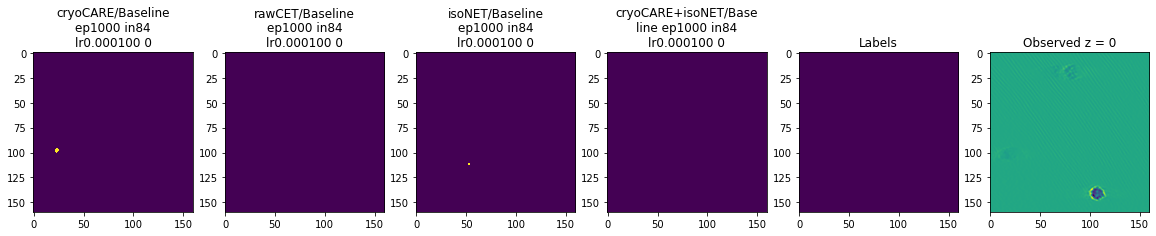

<Figure size 432x288 with 0 Axes>

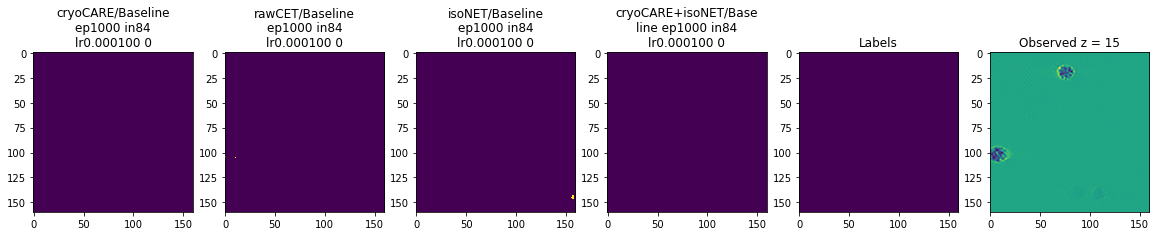

<Figure size 432x288 with 0 Axes>

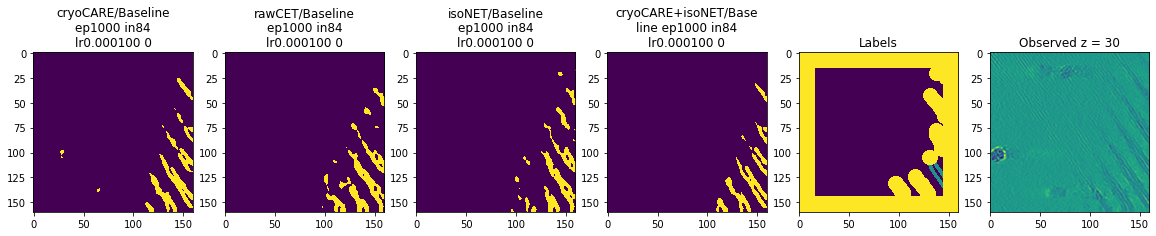

<Figure size 432x288 with 0 Axes>

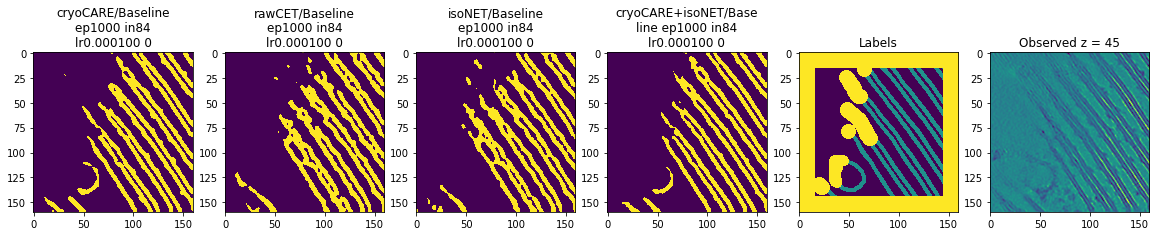

<Figure size 432x288 with 0 Axes>

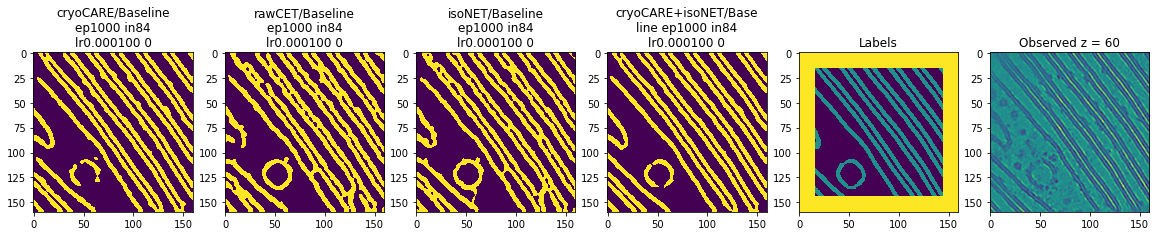

<Figure size 432x288 with 0 Axes>

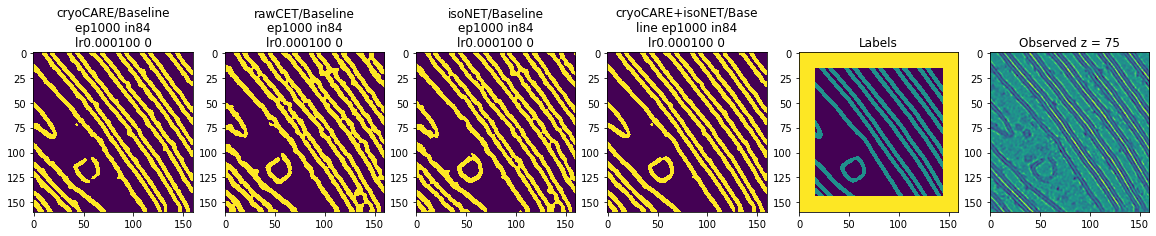

<Figure size 432x288 with 0 Axes>

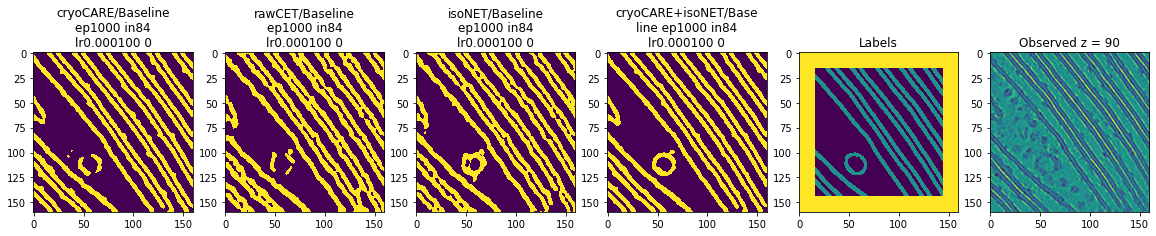

<Figure size 432x288 with 0 Axes>

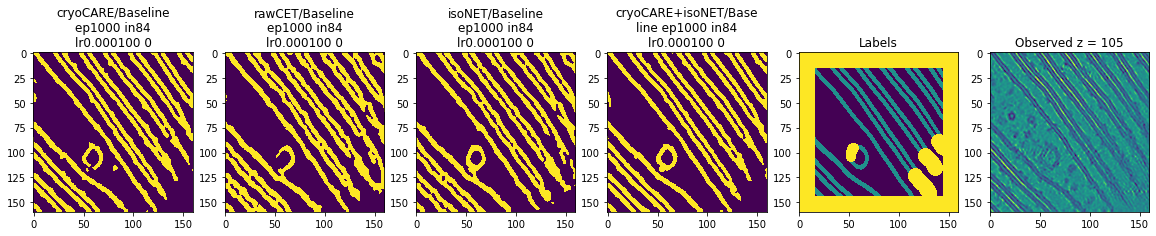

<Figure size 432x288 with 0 Axes>

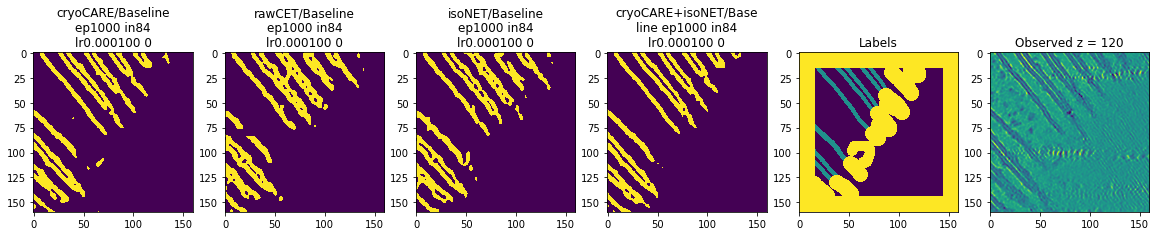

<Figure size 432x288 with 0 Axes>

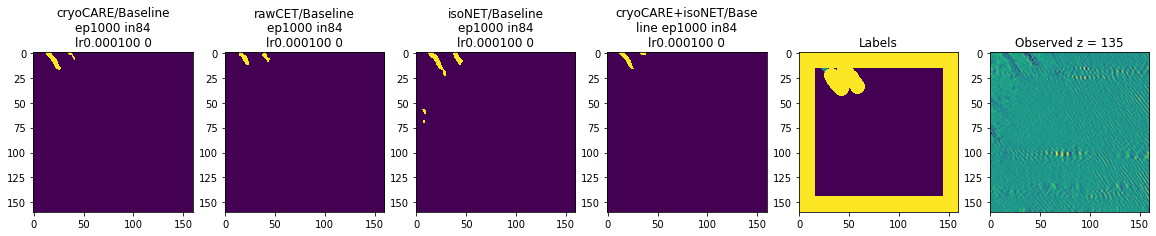

<Figure size 432x288 with 0 Axes>

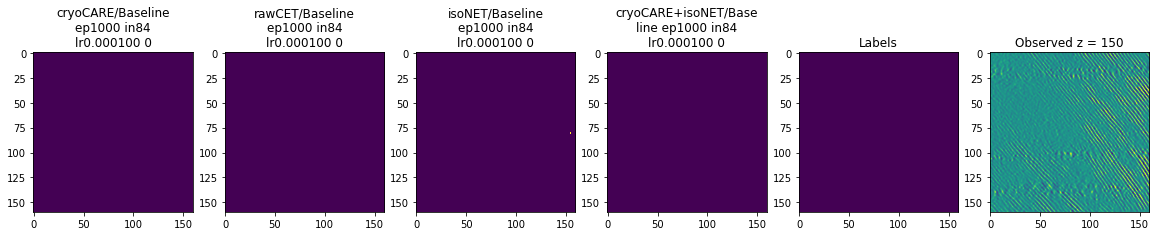

<Figure size 432x288 with 0 Axes>

In [5]:
make_comparison_plot(class_predDict, classes, tomogram_data)